In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nengo
import numpy as np

In [2]:
model = nengo.Network(seed=1)
with model:
    people = nengo.Ensemble(n_neurons=500, dimensions=3,
                            neuron_type = nengo.LIFRate(),
                            radius=2)
    
    stim = nengo.Node([0.7,  # probability 
                       1.0,  # value
                       0.0,  # decision
                      ])
    
    decision = nengo.Node(None, size_in=1)
    nengo.Connection(stim, people)
    
    def decision_rule(x):
        return x[2]
    
    nengo.Connection(people, decision, function=decision_rule)
    
    def gossip(x):
        expected_value = max(x[0],0)*x[1]
        if expected_value > 0.5:
            decide = 1.0
        else:
            decide = -1.0
        return 0, 0, decide + x[2]
    nengo.Connection(people, people, function=gossip, synapse=0.1)
    
    p_decision = nengo.Probe(decision, synapse=0.0)
    p_belief = nengo.Probe(people, synapse=0.0)
    
    

In [3]:
sim = nengo.Simulator(model)
with sim:
    sim.run(2.0)


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

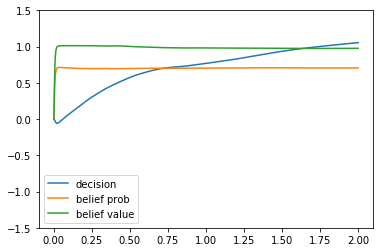

In [4]:
plt.plot(sim.trange(), sim.data[p_decision], label='decision')
plt.plot(sim.trange(), sim.data[p_belief][:,0], label='belief prob')
plt.plot(sim.trange(), sim.data[p_belief][:,1], label='belief value')
plt.ylim(-1.5, 1.5)
plt.legend()

In [5]:
import nengo_gui.ipython
nengo_gui.ipython.IPythonViz(model)